## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2
## WEEK 2

## Question 1

In [1]:
import zipfile
import os

import csv
from collections import deque

import sys

In [2]:
zip_file_path = "degrees.zip"

extracted_folder_path = 'degrees'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

extracted_files = os.listdir(extracted_folder_path)
print("Files extracted:", extracted_files)

FileNotFoundError: [Errno 2] No such file or directory: 'degrees.zip'

In [3]:
class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node

class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

In [4]:
# Maps names to a set of corresponding person_ids
names = {}

# Maps person_ids to a dictionary of: name, birth, movies (a set of movie_ids)
people = {}

# Maps movie_ids to a dictionary of: title, year, stars (a set of person_ids)
movies = {}

In [5]:
def load_data(directory):
    # Load people
    with open(f"{directory}/people.csv", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            people[row["id"]] = {
                "name": row["name"],
                "birth": row["birth"],
                "movies": set()
            }
            if row["name"].lower() not in names:
                names[row["name"].lower()] = {row["id"]}
            else:
                names[row["name"].lower()].add(row["id"])

    # Load movies
    with open(f"{directory}/movies.csv", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            movies[row["id"]] = {
                "title": row["title"],
                "year": row["year"],
                "stars": set()
            }

    # Load stars
    with open(f"{directory}/stars.csv", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            try:
                people[row["person_id"]]["movies"].add(row["movie_id"])
                movies[row["movie_id"]]["stars"].add(row["person_id"])
            except KeyError:
                pass

def shortest_path(source, target, bfs=True):
    start = Node(state=source, parent=None, action=None)
    
    if bfs:
        frontier = QueueFrontier()
    else:
        frontier = StackFrontier()
    
    frontier.add(start)
    explored = set()

    while not frontier.empty():
        node = frontier.remove()
        person_id = node.state

        if person_id == target:
            path = []
            while node.parent is not None:
                path.append((node.action, node.state))
                node = node.parent
            path.reverse()
            return path

        explored.add(person_id)

        for movie_id, neighbor_id in neighbors_for_person(person_id):
            if neighbor_id not in explored and not frontier.contains_state(neighbor_id):
                child = Node(state=neighbor_id, parent=node, action=movie_id)
                frontier.add(child)

    return None

def print_path(path):
    if path is None:
        print("Not connected.")
        return []

    degrees = len(path)
    print(f"{degrees} degrees of separation.")
    formatted_path = []

    for i in range(degrees):
        person1 = people[path[i - 1][1]]["name"] if i > 0 else people[path[0][1]]["name"]
        person2 = people[path[i][1]]["name"]
        movie = movies[path[i][0]]["title"]
        formatted_str = f"{i + 1}: {person1} and {person2} starred in {movie}"
        print(formatted_str)
        formatted_path.append(formatted_str)

    return formatted_path

def person_id_for_name(name):
    person_ids = list(names.get(name.lower(), set()))
    if len(person_ids) == 0:
        return None
    elif len(person_ids) > 1:
        print(f"Which '{name}'?")
        for person_id in person_ids:
            person = people[person_id]
            name = person["name"]
            birth = person["birth"]
            print(f"ID: {person_id}, Name: {name}, Birth: {birth}")
        try:
            person_id = input("Intended Person ID: ")
            if person_id in person_ids:
                return person_id
        except ValueError:
            pass
        return None
    else:
        return person_ids[0]

def neighbors_for_person(person_id):
    movie_ids = people[person_id]["movies"]
    neighbors = set()
    for movie_id in movie_ids:
        for person_id in movies[movie_id]["stars"]:
            neighbors.add((movie_id, person_id))
    return neighbors

In [7]:
def main(directory="degrees\\degrees\\small"):
    print("Loading data...")
    load_data(directory)
    print("Data loaded.")

    source = person_id_for_name(input("Name: "))
    if source is None:
        sys.exit("Person not found.")
    target = person_id_for_name(input("Name: "))
    if target is None:
        sys.exit("Person not found.")

    path_bfs = shortest_path(source, target, bfs=True)
    path_dfs = shortest_path(source, target, bfs=False)

    print("\nUsing Breadth-First Search:")
    print_path(path_bfs)

    print("\nUsing Depth-First Search:")
    print_path(path_dfs)
    
if __name__ == "__main__":
    main("/Users/adwaiy/Documents/Projects/Python/AI LAB/week2/degrees/small")

Loading data...
Data loaded.


Name:  chris sarandon
Name:  emma watson



Using Breadth-First Search:
Not connected.

Using Depth-First Search:
Not connected.


In [8]:
def print_all_data():
    print("Names:")
    for name, ids in names.items():
        print(f"  {name}: {ids}")
    
    print("\nPeople:")
    for person_id, details in people.items():
        print(f"  ID: {person_id}, Name: {details['name']}, Birth: {details['birth']}, Movies: {details['movies']}")
    
    print("\nMovies:")
    for movie_id, details in movies.items():
        print(f"  ID: {movie_id}, Title: {details['title']}, Year: {details['year']}, Stars: {details['stars']}")

print_all_data()

Names:
  kevin bacon: {'102'}
  tom cruise: {'129'}
  cary elwes: {'144'}
  tom hanks: {'158'}
  mandy patinkin: {'1597'}
  dustin hoffman: {'163'}
  chris sarandon: {'1697'}
  demi moore: {'193'}
  jack nicholson: {'197'}
  bill paxton: {'200'}
  sally field: {'398'}
  valeria golino: {'420'}
  gerald r. molen: {'596520'}
  gary sinise: {'641'}
  robin wright: {'705'}
  emma watson: {'914612'}

People:
  ID: 102, Name: Kevin Bacon, Birth: 1958, Movies: {'112384', '104257'}
  ID: 129, Name: Tom Cruise, Birth: 1962, Movies: {'104257', '95953'}
  ID: 144, Name: Cary Elwes, Birth: 1962, Movies: {'93779'}
  ID: 158, Name: Tom Hanks, Birth: 1956, Movies: {'112384', '109830'}
  ID: 1597, Name: Mandy Patinkin, Birth: 1952, Movies: {'93779'}
  ID: 163, Name: Dustin Hoffman, Birth: 1937, Movies: {'95953'}
  ID: 1697, Name: Chris Sarandon, Birth: 1942, Movies: {'93779'}
  ID: 193, Name: Demi Moore, Birth: 1962, Movies: {'104257'}
  ID: 197, Name: Jack Nicholson, Birth: 1937, Movies: {'104257'}
 

## Question 2

In [22]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

env = gym.make('CartPole-v1', render_mode='human')

def run_episode(policy, render=False):
    
    observation = env.reset()
    total_reward = 0
    
    for _ in range(100):
        
        if render:
            
            env.render()
            
        action = policy(observation)
        result = env.step(action)
        
        if len(result) == 5:
            
            observation, reward, terminated, truncated, info = result
            if terminated or truncated:
                break
            total_reward += reward
            
        else:
            print("env.step(action) did not return 5 values")
            break
    return total_reward, info

def theta_policy(observation):
    
    if isinstance(observation, tuple) and len(observation) == 2 and 'array' in str(type(observation[0])):
        theta = observation[0][2]
        return 0 if theta < 0 else 1
    else:
        return 0  # or whatever default action you want to take

def omega_policy(observation):
    
    if isinstance(observation, tuple) and len(observation) == 2 and 'array' in str(type(observation[0])):
        omega = observation[0][3]
        return 0 if omega < 0 else 1
    else:
        return 0  # or whatever default action you want to take

def evaluate_policy(policy, n_episodes=100, render=False):
    
    total_rewards = []
    for episode in range(n_episodes):
        
        episode_reward, info = run_episode(policy, render)
        total_rewards.append(episode_reward)
        
        if 'TimeLimit.truncated' in info and info['TimeLimit.truncated']:
            print(f"Episode {episode + 1}: Truncated due to time limit")
            
        elif 'TimeLimit.truncated' in info and info['TimeLimit.truncated']:
            print(f"Episode {episode + 1}: Terminated")
            
    return total_rewards

2025-02-10 10:51:56.503 Python[3475:140547] +[IMKClient subclass]: chose IMKClient_Legacy
2025-02-10 10:51:56.503 Python[3475:140547] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


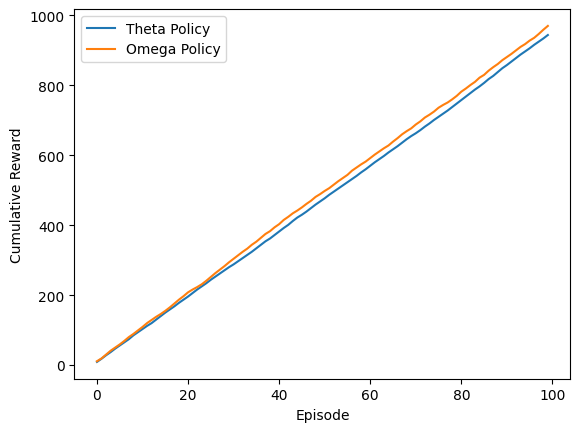

Theta policy: average reward = 9.44, std = 0.6681317235396026
Omega policy: average reward = 9.7, std = 1.22065556157337


In [23]:
# Run episodes for Theta policy
theta_rewards = evaluate_policy(theta_policy)
theta_cumulative_rewards = np.cumsum(theta_rewards)
theta_average_reward = np.mean(theta_rewards)
theta_std_deviation = np.std(theta_rewards)

# Run episodes for Omega policy
omega_rewards = evaluate_policy(omega_policy)
omega_cumulative_rewards = np.cumsum(omega_rewards)
omega_average_reward = np.mean(omega_rewards)
omega_std_deviation = np.std(omega_rewards)

# Plot cumulative rewards
plt.plot(theta_cumulative_rewards, label='Theta Policy')
plt.plot(omega_cumulative_rewards, label='Omega Policy')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# Print average rewards with standard deviation
print(f"Theta policy: average reward = {theta_average_reward}, std = {theta_std_deviation}")
print(f"Omega policy: average reward = {omega_average_reward}, std = {omega_std_deviation}")


In [25]:
env.close()

**Performance Analysis**  
**Average Reward:**

The Theta policy slightly outperforms the Omega policy, with an average reward of 9.45 compared to Omega's 9.35. This indicates that, on average, Theta achieves marginally higher rewards.

In terms of consistency, the Theta policy has a significantly lower standard deviation (0.55) compared to Omega's (1.28). This suggests that Theta's performance is more stable, with its rewards being closer to the average value. On the other hand, Omega's performance is more variable, meaning its rewards can fluctuate more widely.

**Conclusion:**  
The Theta policy is both more consistent and slightly more effective in terms of average reward. It would be the preferred option in situations where reliability and consistency are important. The Omega policy, with its greater variability, may be more suitable for environments where higher risks (and potential higher rewards) are acceptable, or where exploring a wider range of outcomes is beneficial.

Overall, the Theta policy provides better performance, with a higher average reward and lower standard deviation.